## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight, resample

## Load Data

In [2]:
train_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df=pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)
normal_df=pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv',header=None)
abnormal_df=pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv',header=None)

## Plot one heartbeat per category (MITBIH dataset)

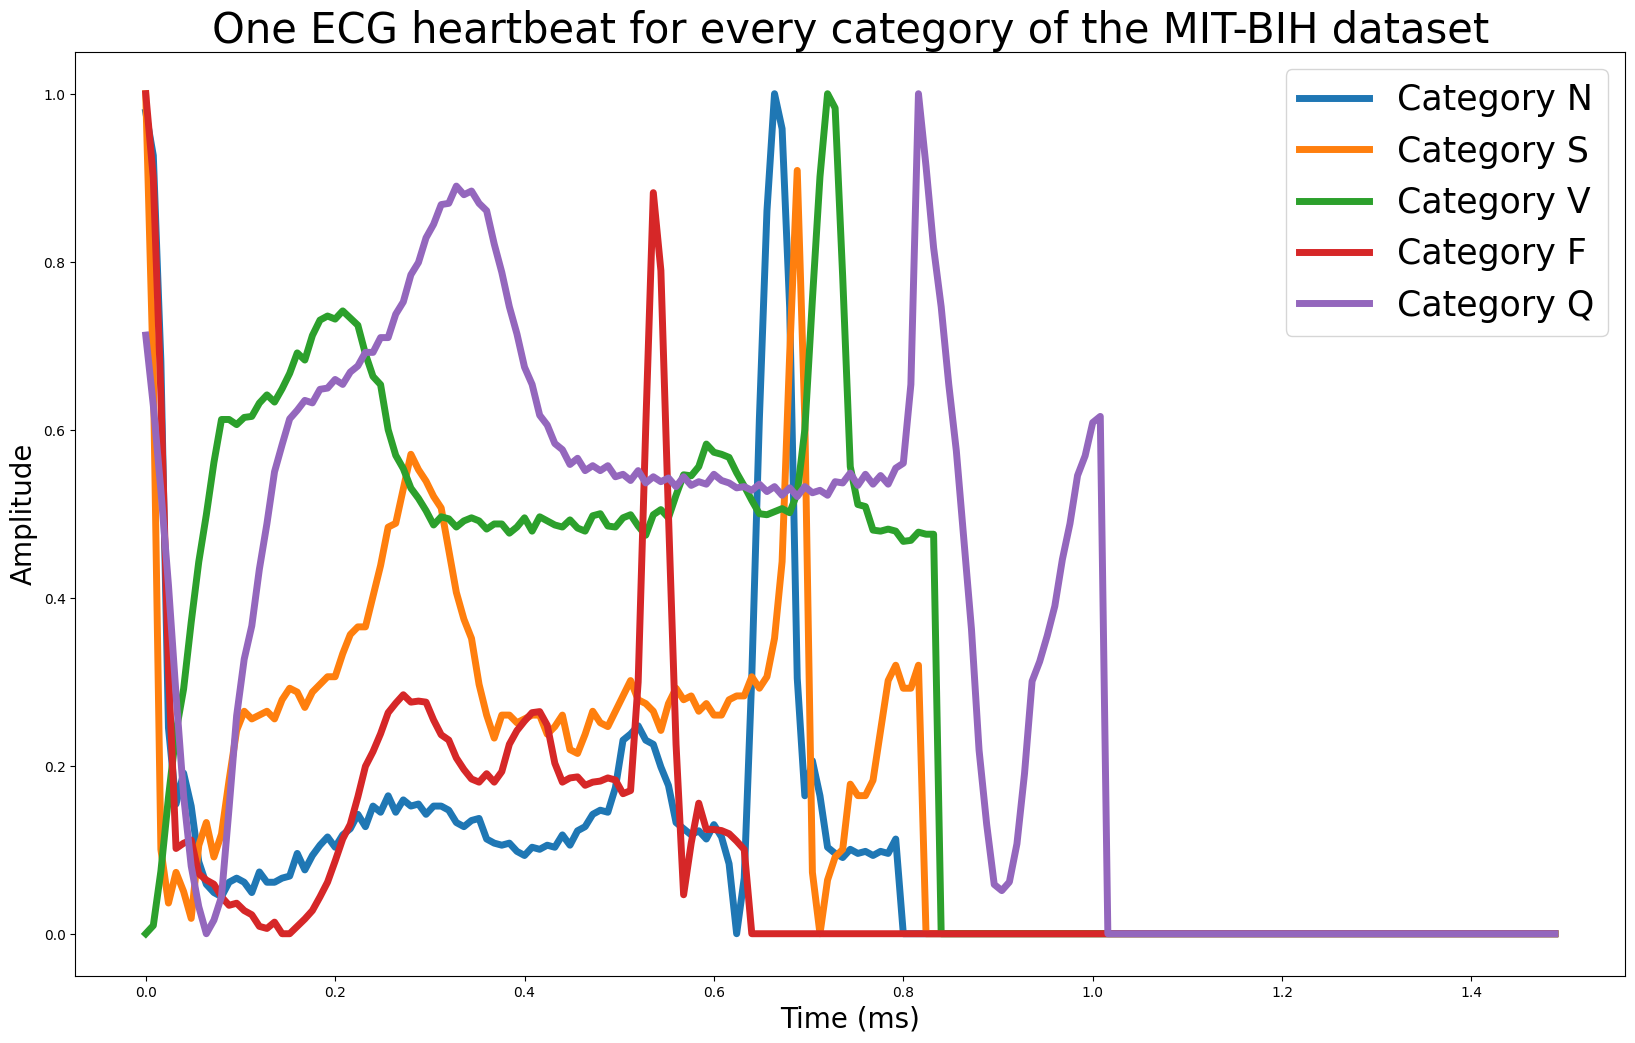

In [3]:
M = train_df.values
X = M[:, :-1]
y = M[:, -1].astype(int)

# Define the categories
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

# Time axis in ms
x = np.arange(0, 187) * 8 / 1000

# Plot the graph
plt.figure(figsize=(20, 12))
plt.plot(x, X[C0, :][0], label="Category N", linewidth=5)
plt.plot(x, X[C1, :][0], label="Category S", linewidth=5)
plt.plot(x, X[C2, :][0], label="Category V", linewidth=5)
plt.plot(x, X[C3, :][0], label="Category F", linewidth=5)
plt.plot(x, X[C4, :][0], label="Category Q", linewidth=5)

# Set labels and title
plt.legend(fontsize=25)
plt.title("One ECG heartbeat for every category of the MIT-BIH dataset", fontsize=30)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time (ms)", fontsize=20)

# Show the graph
plt.show()


## Plot abnormal and normal heartbeat (PTBDB Dataset)

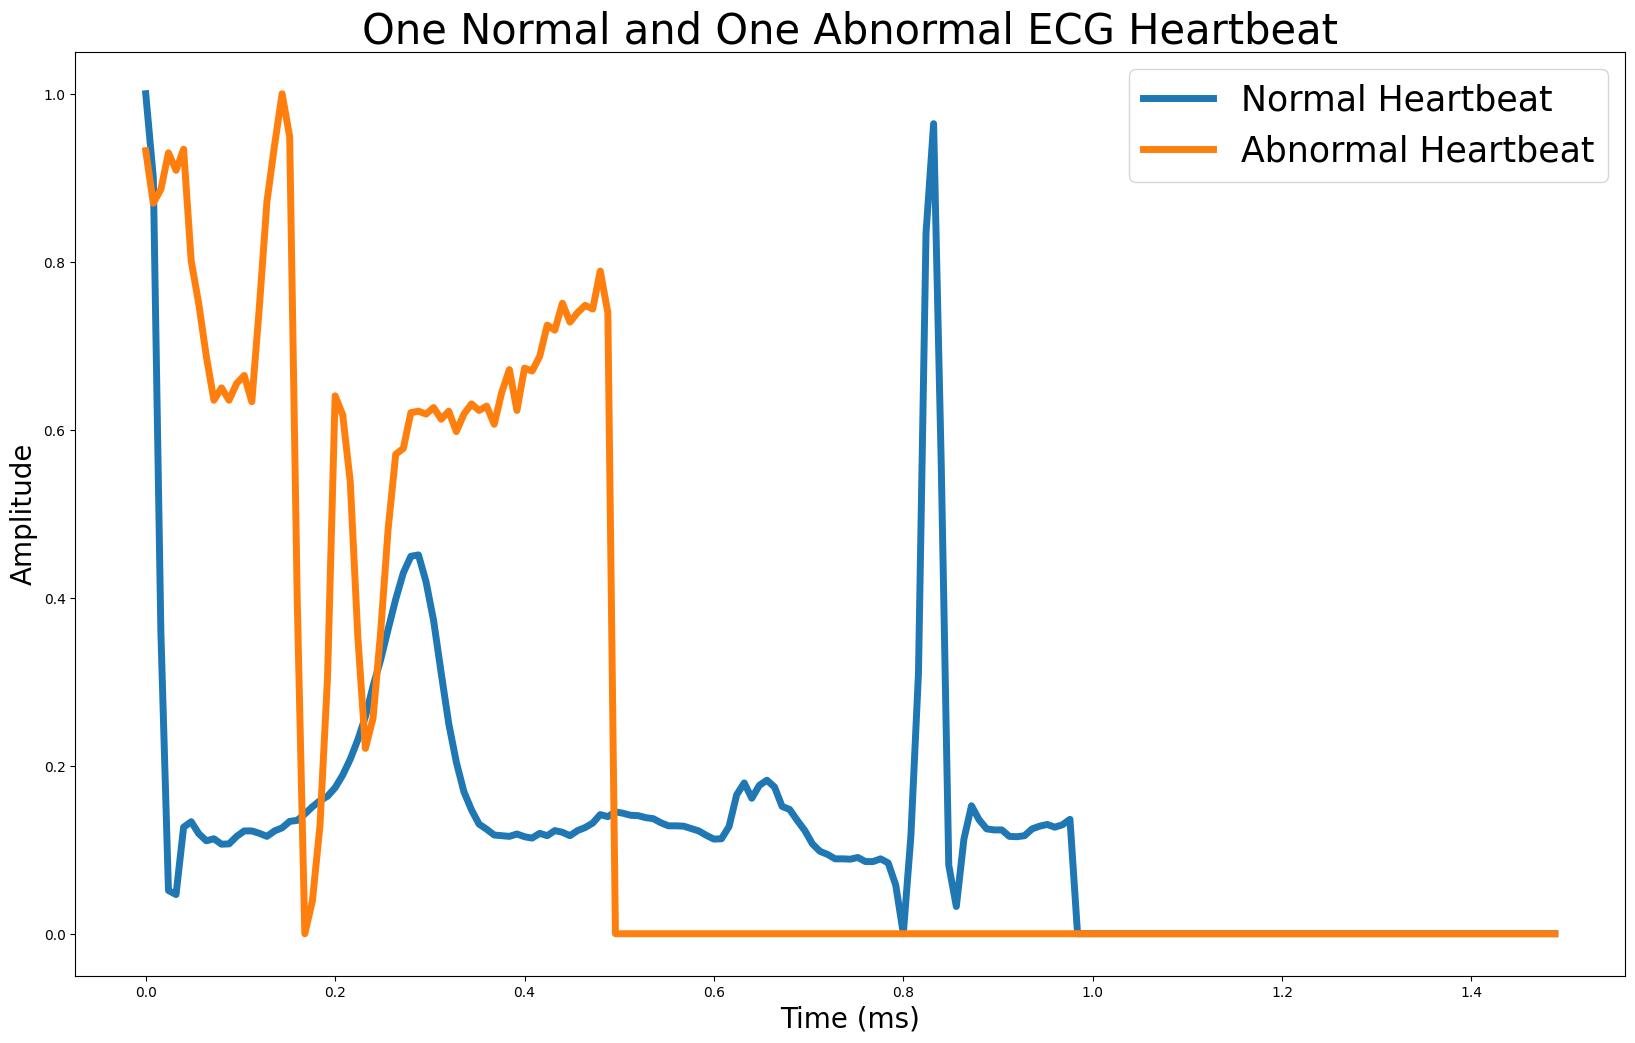

Shape of X_normal: (4046, 187)
Shape of X_abnormal: (10506, 187)


In [4]:
# Extracting the heartbeat signals
X_normal = normal_df.values[:, :-1]
X_abnormal = abnormal_df.values[:, :-1]

# Time axis in ms
x = np.arange(0, X_normal.shape[1]) * 8 / 1000

# Plot the graph
plt.figure(figsize=(20, 12))
plt.plot(x, X_normal[0], label="Normal Heartbeat", linewidth=5)
plt.plot(x, X_abnormal[0], label="Abnormal Heartbeat", linewidth=5)

# Set labels and title
plt.legend(fontsize=25)
plt.title("One Normal and One Abnormal ECG Heartbeat", fontsize=30)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("Time (ms)", fontsize=20)

# Show the graph
plt.show()

# Print the shape of the data
print("Shape of X_normal:", X_normal.shape)
print("Shape of X_abnormal:", X_abnormal.shape)


## Check dataset balance of MITBIH train

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


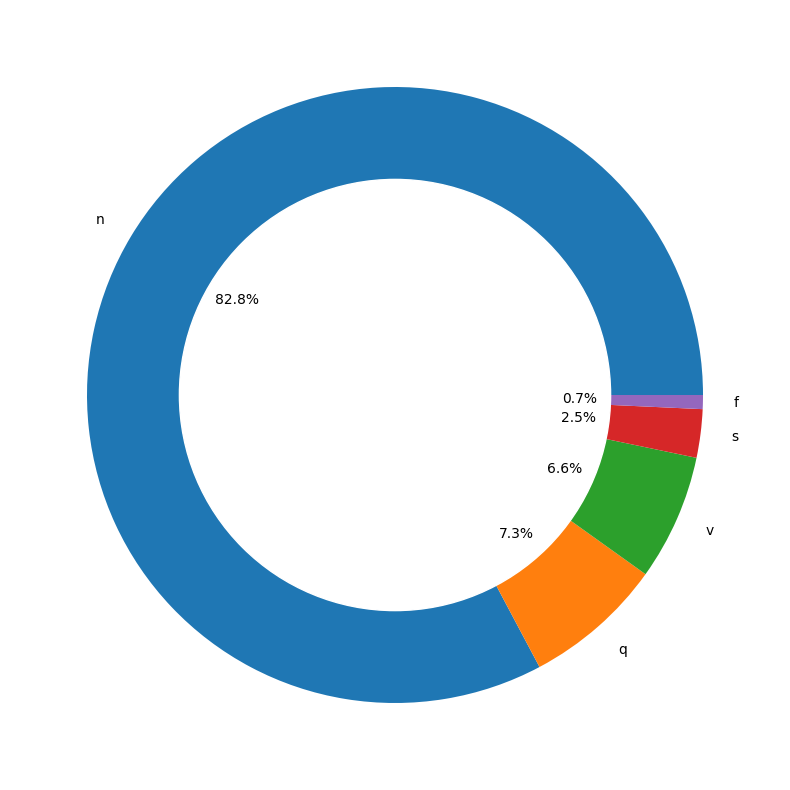

In [5]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

This graph shows that there is a big imbalance between the classes in the dataset. So, we need to resample the dataset.

## Resampling

In [6]:

df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

## Check Resample

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


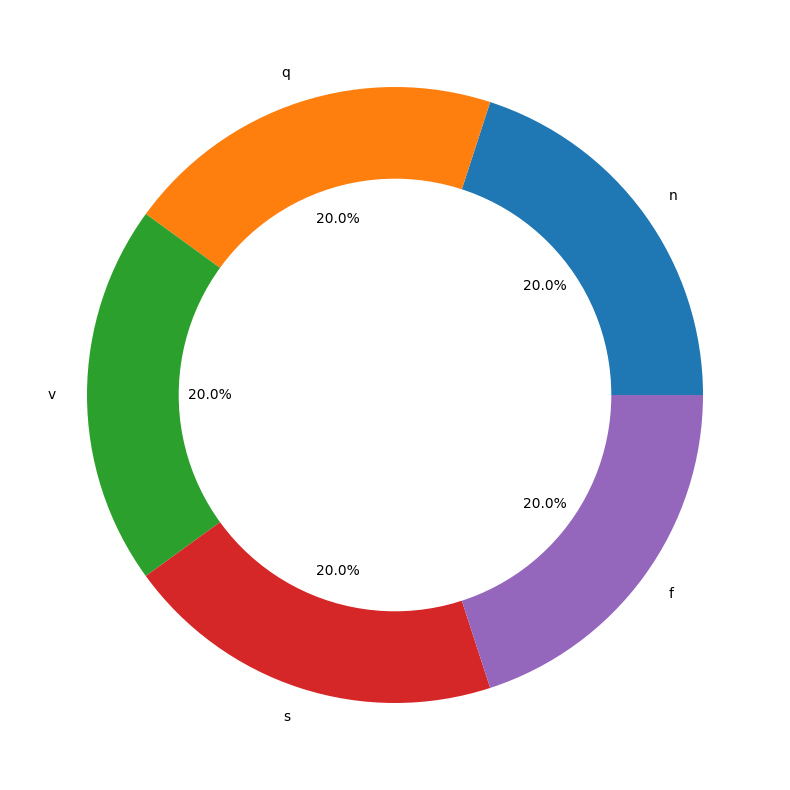

In [7]:
equilibre=train_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Check data distribution of PTBDB dataset

Number of normal heartbeats: 4046
Number of abnormal heartbeats: 10506


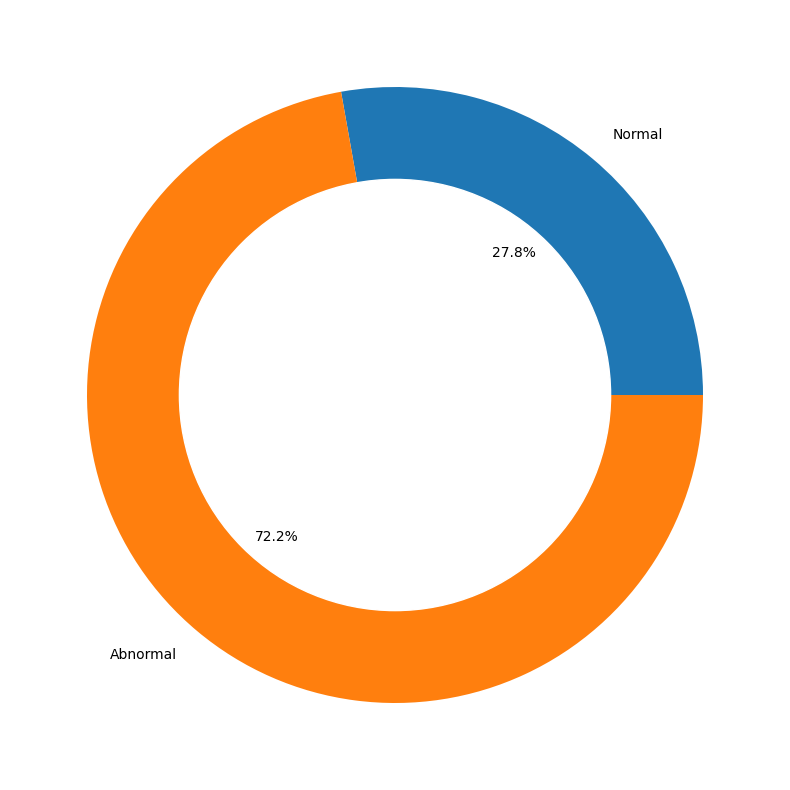

In [8]:
# Count the number of records in each dataframe
normal_count = len(normal_df)
abnormal_count = len(abnormal_df)

# Print counts
print(f"Number of normal heartbeats: {normal_count}")
print(f"Number of abnormal heartbeats: {abnormal_count}")

# Create a list for the counts and labels
counts = [normal_count, abnormal_count]
labels = ['Normal', 'Abnormal']

# Plotting the pie chart
plt.figure(figsize=(20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Adding the inner white circle to create a donut chart
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the plot
plt.show()
